# _REGULARIZATION_

Ridge, LASSO & Elastic Net

- Mengurangi atau menambahkan nilai SSE (sum squared error) atau RSS (residual sum squared)

1. L1 Reguralization = SSE + lambda . |m|

2. L2 Reguralization = SSE + lambda . m^2

L1 Reg = LASSO regression

L2 Reg = Ridge regression

L1 + L2 Reg = Elastic Net regression

jika lambda = 0
maka hasilnya adalah OLS/Simpe Linear Regression



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [13]:
df = pd.DataFrame({
    'x': np.arange(10),
    'y': np.arange(10) + np.random.randn(10)
})
df

,x,y
0,0,0.381400
1,1,0.299647
2,2,2.602957
3,3,5.363245
4,4,4.423757
5,5,6.067924
6,6,5.548248
7,7,7.888223
8,8,7.785545
9,9,9.305461


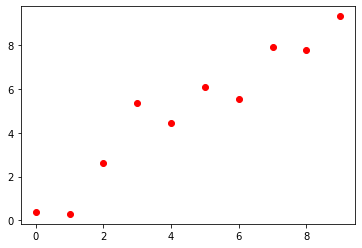

In [14]:
plt.plot(df['x'], df['y'], 'ro')
plt.show()

In [16]:
model = LinearRegression()

In [17]:
#training
model.fit(df[['x']], df['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
model.coef_[0], model.intercept_

(0.9778384045517051, 0.5663678864151276)

In [20]:
# akurasi prediksi thd x & y yg dijadikan data training
# akurasi = seberapa sering tebakan model itu benar
model.score(df[['x']], df['y'])
# artinya datanya ini akurasinya 92%

0.9204372216730125

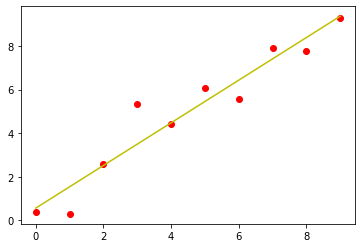

In [25]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], model.coef_[0] * df['x'] + model.intercept_, 'y-')
plt.show()

In [26]:
model2 = LinearRegression()

In [28]:
# model2 di-training dgn hanya 2 data pertama
model2.fit(df.iloc[:2][['x']], df.iloc[:2]['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

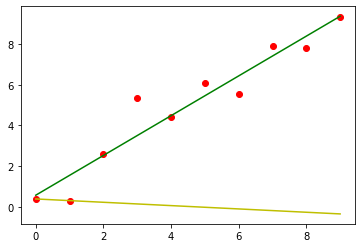

In [29]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], model.coef_[0] * df['x'] + model.intercept_, 'g-')
plt.plot(df['x'], model2.coef_[0] * df['x'] + model2.intercept_, 'y-')
plt.show()
#bisa dilihat best fit line yg kuning ( best fit line yang cuma menggunakan 2 data pertama) melenceng jauh

In [30]:
model2.score(df[['x']], df['y'])

-3.022972629104596

## Ridge Regression

L2 Regularization SSE = SSE $\displaystyle + \lambda \cdot m^2$

In [50]:
from sklearn.linear_model import Ridge

In [61]:
# training 2 data pertama
# default alpha 1
model3 = Ridge(alpha=1)
model3.fit(df.iloc[:2][['x']], df.iloc[:2]['y'])

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

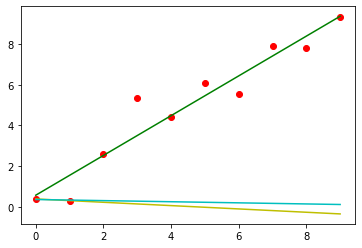

In [62]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], model.coef_[0] * df['x'] + model.intercept_, 'g-')
plt.plot(df['x'], model2.coef_[0] * df['x'] + model2.intercept_, 'y-')
plt.plot(df['x'], model3.predict(df[['x']]), 'c-')
plt.show()

## 2. LASSO Regression

- LASSO (Least Absolute Shrinkage & Selection Operator)

- L1 norm regularization SSE = SSE $\displaystyle + \lambda \cdot |m|$

-  Di sklearn nilai ralat/penalty diatur dengan property ```alpha```

- Jika ```alpha = 0``` maka hasilnya sama seperti linear regression biasa

In [63]:
from sklearn.linear_model import Lasso

In [73]:
model4 = Lasso(alpha=0.5)

model4.fit(df.iloc[:2][['x']], df.iloc[:2]['y'])

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

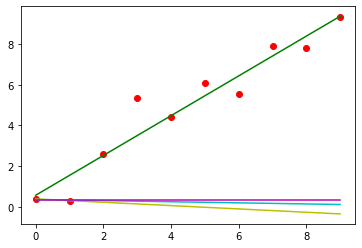

In [74]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], model.coef_[0] * df['x'] + model.intercept_, 'g-')
plt.plot(df['x'], model2.coef_[0] * df['x'] + model2.intercept_, 'y-')
plt.plot(df['x'], model3.predict(df[['x']]), 'c-')
plt.plot(df['x'], model4.predict(df[['x']]), 'm-')
plt.show()

## 3. Elastic Net Regression

- L1 + L2 Regularization

- SSE = SSE $\displaystyle + \lambda_{\textrm{ridge}} \cdot m^2 + \lambda_{\textrm{lasso}} \cdot |m|$

- Di sklearn, nilai penalty bisa diatur via prop ```alpha```


In [76]:
from sklearn.linear_model import ElasticNet
model5 = ElasticNet(alpha=1)
model.fit(df.iloc[:2][['x']], df.iloc[:2][['y']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
plt.plot(df['x'], df['y'], 'ro')
plt.plot(df['x'], model.coef_[0] * df['x'] + model.intercept_, 'g-')
plt.plot(df['x'], model2.coef_[0] * df['x'] + model2.intercept_, 'y-')
plt.plot(df['x'], model3.predict(df[['x']]), 'c-')
plt.plot(df['x'], model4.predict(df[['x']]), 'm-')
plt.plot(df['x'], model5.predict(df[['x']]), 'b-')
plt.show()